In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [4]:
df= pd.read_excel("C:\Data Science Assignments\Basics Statistis 1\Forecasting\Airlines+Data.xlsx")

In [5]:
df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [6]:
df.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


### Visualization

<AxesSubplot:>

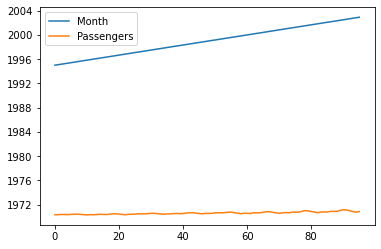

In [8]:
df.plot()

<AxesSubplot:>

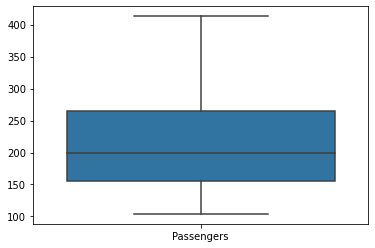

In [9]:
import seaborn as  sns
sns.boxplot(data =df)

array([[<AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'Passengers'}>]], dtype=object)

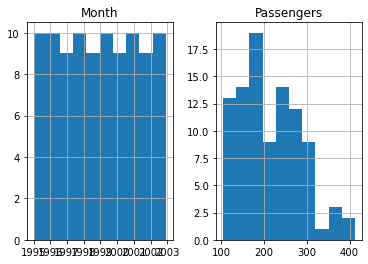

In [10]:
df.hist()

In [14]:
np.array(df["Passengers"])

array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
       126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
       178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
       181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
       229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
       264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
       364, 347, 312, 274, 237, 278, 284, 277, 317, 313, 318, 374, 413,
       405, 355, 306, 271, 306], dtype=int64)

C:\Users\Kajal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


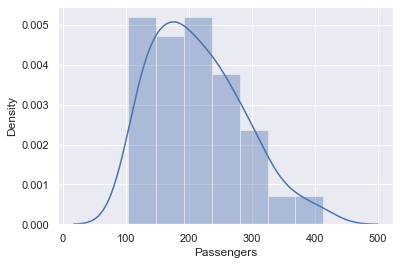

In [15]:
import seaborn as sns
sns.set_theme()
rk= sns.distplot(df['Passengers'],kde=True)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

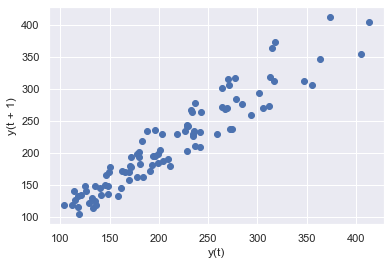

In [16]:
from pandas.plotting import lag_plot
lag_plot(df['Passengers'])

### Data Preprocessing

In [17]:
df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [18]:
len(df)

96

In [22]:
df['Month'].value_counts()

0    96
Name: Month, dtype: int64

In [24]:
df_dummies=pd.DataFrame(pd.get_dummies(df['Month']),columns=['Q1','Q2','Q3','Q4'])


In [26]:
cc=pd.concat([df,df_dummies],axis= 1)


In [27]:
df.head()


,Month,Passengers
0,0,112
1,0,118
2,0,132
3,0,129
4,0,121


In [28]:
cc


,Month,Passengers,Q1,Q2,Q3,Q4
0,0,112,NaN,NaN,NaN,NaN
1,0,118,NaN,NaN,NaN,NaN
2,0,132,NaN,NaN,NaN,NaN
3,0,129,NaN,NaN,NaN,NaN
4,0,121,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
91,0,405,NaN,NaN,NaN,NaN
92,0,355,NaN,NaN,NaN,NaN
93,0,306,NaN,NaN,NaN,NaN
94,0,271,NaN,NaN,NaN,NaN


In [44]:
import pandas as pd
import numpy as np

# Create a DataFrame with an index of length 97
cc = pd.DataFrame(index=np.arange(1, 98))

# Add the 't' column
cc['t'] = np.arange(1, 98)

# Add other columns as needed
cc['t_squared'] = cc['t']**2
cc["Passengers_log"] = np.log(df['Passengers'])  # Replace 'df' with the appropriate DataFrame

# Now 'cc' should have the correct length for the index and values.


In [45]:
cc.head()

,t,t_squared,Passengers_log
1,1,1,4.770685
2,2,4,4.882802
3,3,9,4.859812
4,4,16,4.795791
5,5,25,4.905275


<AxesSubplot:>

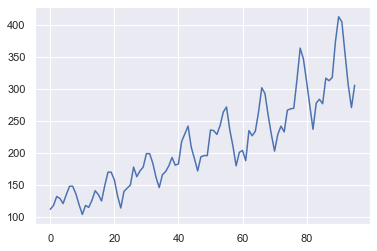

In [46]:
train =cc.head(32)
test =cc.tail(10)
df['Passengers'].plot()

### Models

In [50]:
from sklearn.metrics import mean_squared_error
